## Aero Fit Thread Mill Analysis

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Problem Statement**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('aerofit_treadmill.csv')

In [3]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### There are no null values in the data , as we can see in above result.

### Summary & Descriptions of columns 

- Product Purchased:	KP281, KP481, or KP781
- Age:	In years
- Gender:	Male/Female
- Education:	In years
- MaritalStatus:	Single or partnered
- Usage:	The average number of times the customer plans to use the treadmill each week.
- Income:	Annual income (in $)
- Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

- Miles:	The average number of miles the customer expects to walk/run each week


**Product Portfolio:**

> The KP281 is an entry-level treadmill that sells for $1,500.

> The KP481 is for mid-level runners that sell for $1,750.

> The KP781 treadmill is having advanced features that sell for $2,500.

In [5]:
# Lets have a look on shape & structure of our data 

shp = df.shape

f'Our data contains {shp[0]} records and {shp[1]} columns'

'Our data contains 180 records and 9 columns'

### Descriptive Stats of our Numerical data

In [6]:
df.describe(exclude='O')

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.describe(include='O')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [8]:
# Used value-counts method to get unique values & their counts 
# i.e. used for categorical variables

def get_proportion(df, col):
    k = df.groupby([col]).size().reset_index().rename({0: 'count'}, axis=1)
    k['proportion'] = round(k['count']/k['count'].sum(), 2)*100
    return k

In [9]:
get_proportion(df, 'Product')

,Product,count,proportion
0,KP281,80,44.0
1,KP481,60,33.0
2,KP781,40,22.0


In [10]:
get_proportion(df, 'Gender')

,Gender,count,proportion
0,Female,76,42.0
1,Male,104,58.0


In [11]:
get_proportion(df, 'MaritalStatus')

,MaritalStatus,count,proportion
0,Partnered,107,59.0
1,Single,73,41.0


### Insights from Categorical data

**Product Column**
1. In our data different types of thread mill machines : KP281, KP481, KP781
2. From value counts above we can infer that , KP281 is mostly used with 44% proportion out of total.

**Gender**
- And we can also see that we have majority of our data is recorded for men (58 %) and 42% of women.

**MaritalStatus**
- 60 % of data is filled with parterned members & rest 40% of single.


### Numerical Column data

**Age**
1. Minimum age of a person is 18 & maximum is 50.
2. Average age in our recorded data is around 28 with std of 7.

**education**
- The average education of customers is 15 years, with a range of 12 to 21 years of education. 

**income**
- The average household income of customers is about 53,719USD annually, ranging from as low as 29k to 103k. 

**fitness**
- The average self-rated fitness of customers is 3.3 (on the scale of 1-5), with a range of 1-5. 

**usage**
- On average, customers said they would use the treadmill 3 times a week, with some going as low 2 times weekly to as high as 7 times weekly. 

**miles**
- The average miles expected to be run by the customers weekly is 103 miles, ranging from 23 miles to 360 miles.

In [44]:
#overall description of data
k = df[['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles']]
pd.pivot_table(k,index=['Product','Gender'],columns=['MaritalStatus'])

Age             Education              Fitness  \
MaritalStatus   Partnered     Single  Partnered     Single Partnered   
Product Gender                                                         
KP281   Female  28.333333  28.692308  14.888889  15.538462  2.851852   
        Male    31.380952  25.631579  15.428571  14.473684  2.857143   
KP481   Female  30.000000  28.142857  15.200000  15.214286  2.933333   
        Male    30.380952  25.200000  15.285714  14.500000  2.904762   
KP781   Female  29.000000  24.333333  17.500000  18.333333  5.000000   
        Male    30.000000  28.928571  17.421053  16.928571  4.631579   

                                Income                     Miles              \
MaritalStatus     Single     Partnered        Single   Partnered      Single   
Product Gender                                                                 
KP281   Female  2.923077  46153.777778  45742.384615   74.925926   78.846154   
        Male    3.263158  50028.000000  43265.842105   80.190476   99.526316   
KP481   Female  2.785714  49724.800000  48920.357143   94.000000   80.214286   
        Male    3.000000  49378.285714  47071.800000   87.238095   91.100000   
KP781   Female  4.000000  84972.250000  58516.000000  215.000000  133.333333   
        Male    4.642857  81431.368421  68216.428571  176.315789  147.571429   

                   Usage            
MaritalStatus  Partnered    Single  
Product Gender                      
KP281   Female  2.851852  3.000000  
        Male    3.285714  3.263158  
KP481   Female  3.333333  2.928571  
        Male    2.857143  3.300000  
KP781   Female  5.250000  4.666667  
        Male    4.842105  4.571429

### Uni-variate Analysis


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

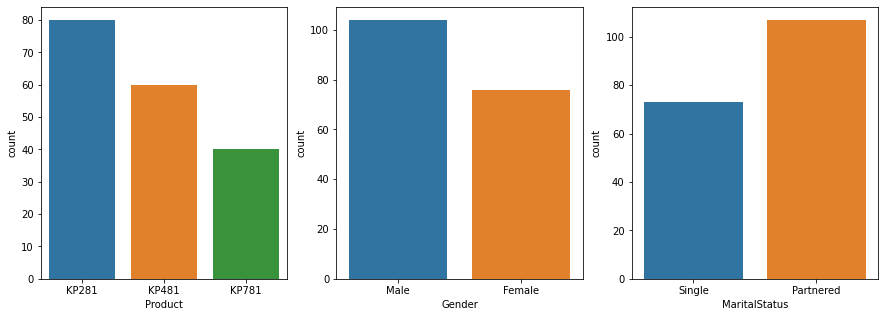

In [13]:
fig, axis = plt.subplots(1,3, figsize=(15, 5))

sns.countplot(x='Product', data=df, ax=axis[0])
sns.countplot(x='Gender', data=df, ax=axis[1])
sns.countplot(x='MaritalStatus', data=df, ax=axis[2])

#### Box-plot for Outliers Detection

<AxesSubplot:xlabel='Fitness'>

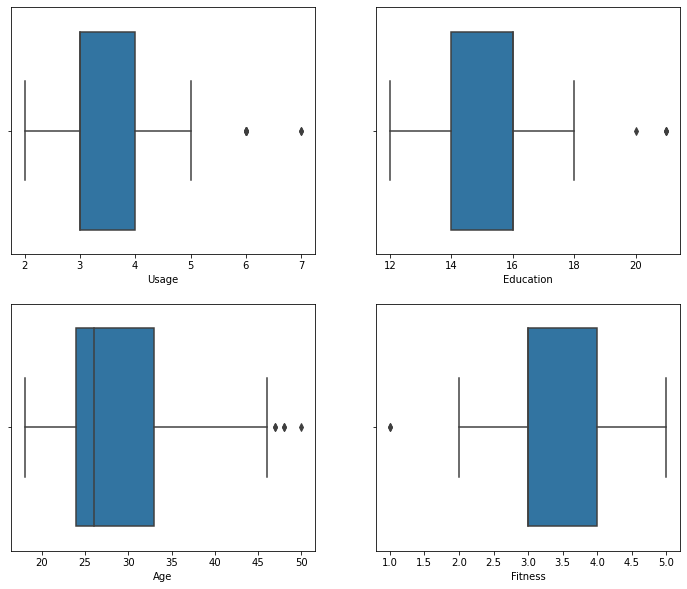

In [14]:
fig, axis = plt.subplots(2,2, figsize=(12, 10))

sns.boxplot(data=df, x="Usage", ax=axis[0,0])
sns.boxplot(data=df, x="Education", ax=axis[0,1])
sns.boxplot(data=df, x="Age", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])

##### As we can see from above box plots , there are some minor amount of records which can be considered under outliers section.

<AxesSubplot:xlabel='Income'>

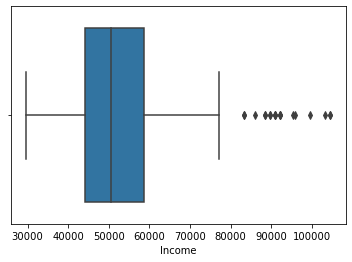

In [15]:
sns.boxplot(data=df, x="Income", orient='h')

##### There are customers that earn more than approx. 77K, which are featured outliers. These are likely the customers purchasing the Kp781 model. Most of the customers are in the 40K-50K range with a right-skewed distribution for income.

<AxesSubplot:xlabel='Miles'>

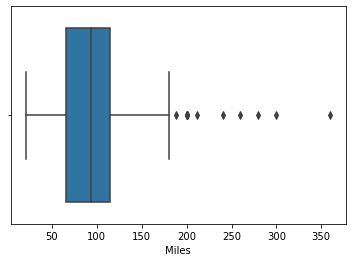

In [16]:
sns.boxplot(data=df, x="Miles", orient='h')

### Here we can see there are some signoficant amount of outliers and also from describe we have noticed that std is also very high.

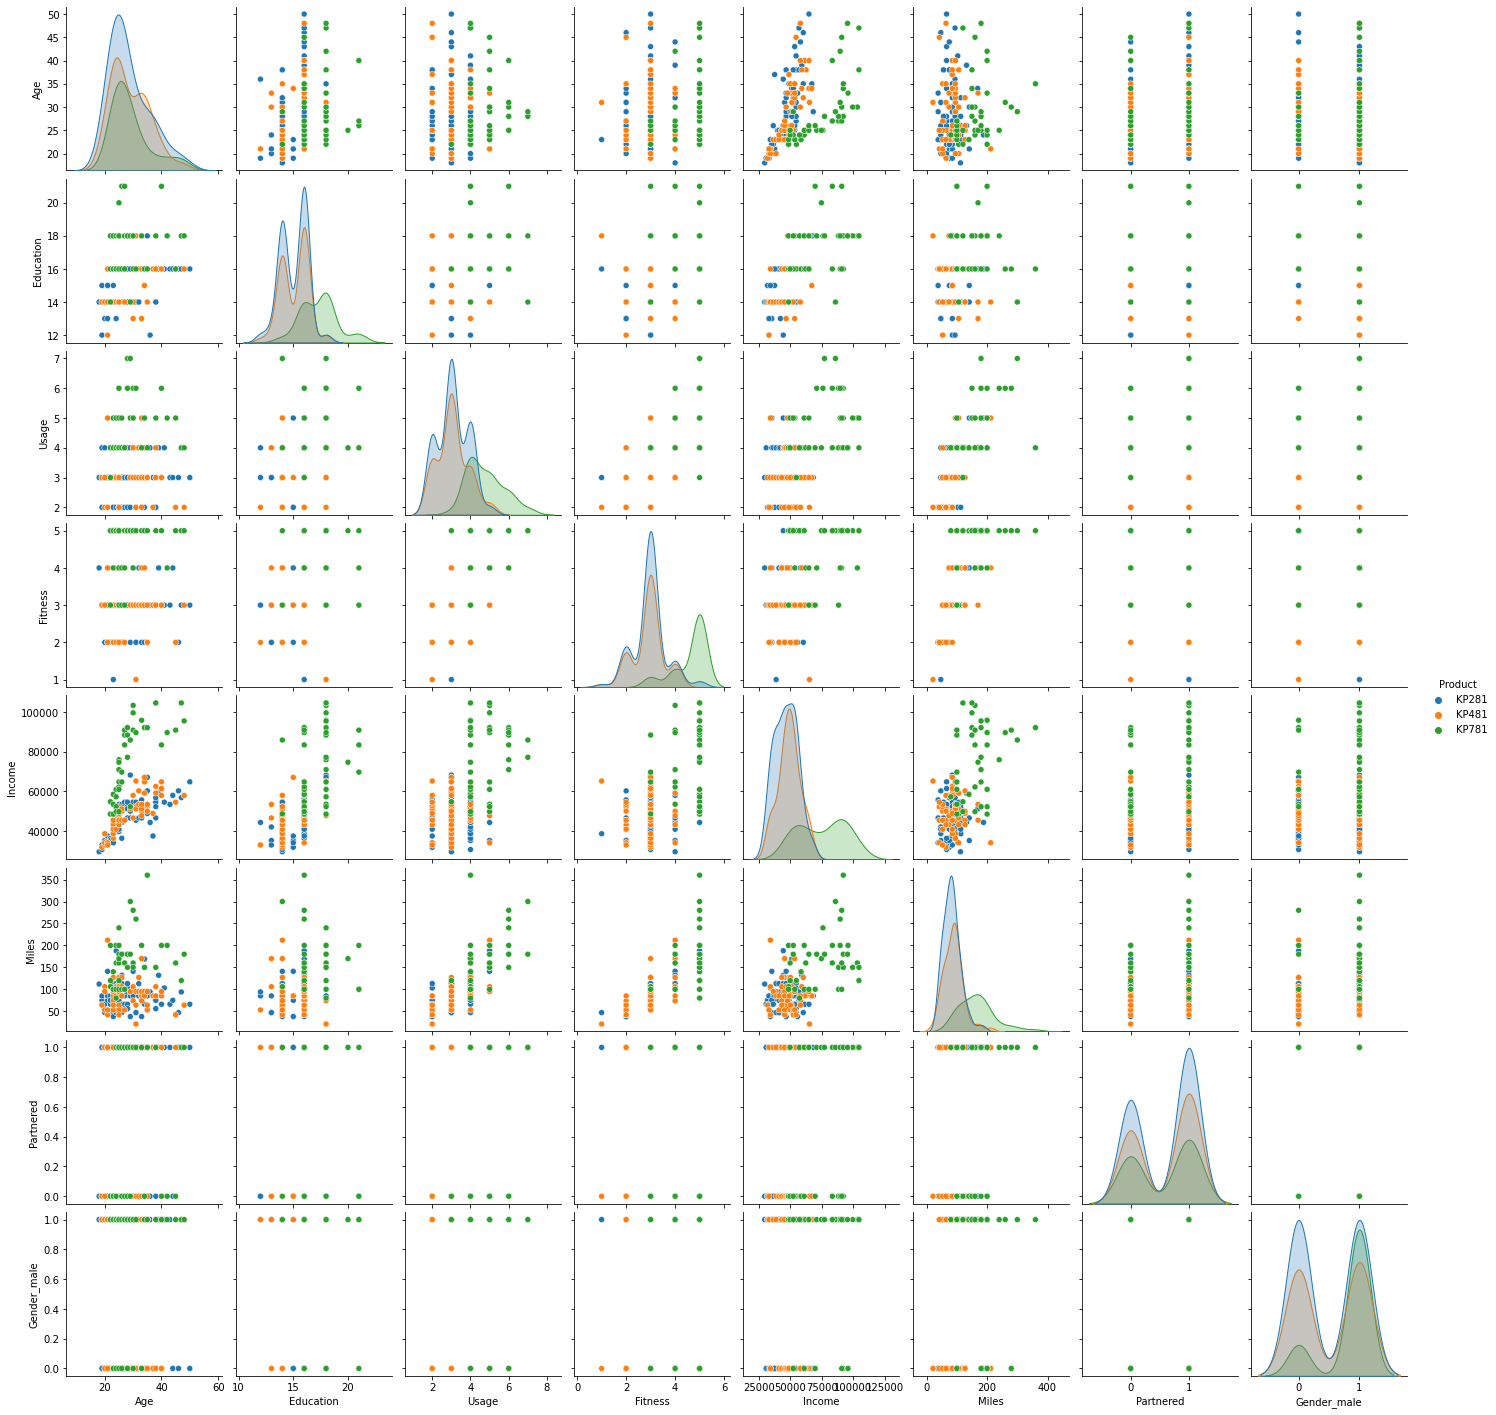

In [37]:
sns.pairplot(df, hue = 'Product');

- Most consumers of any treadmill type fall in the same age ranges.

## Histogram Plot
### Plotting histogram of all numerical veriables , to get info regarding spread of data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

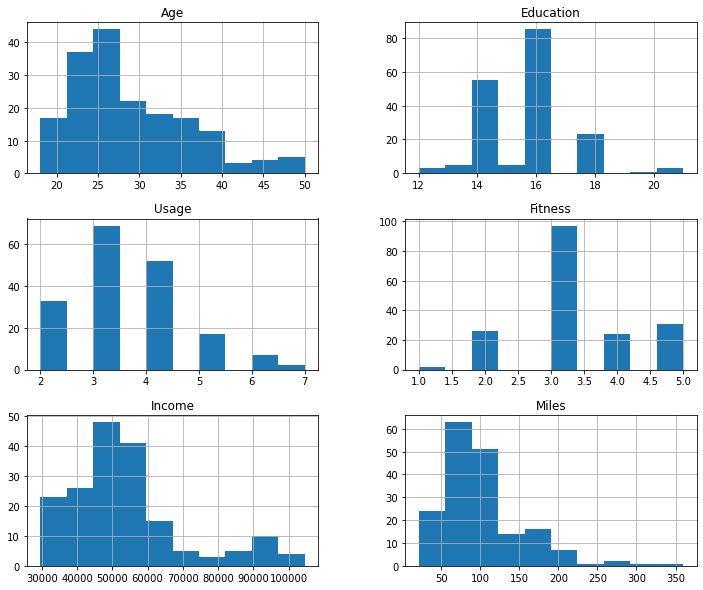

In [17]:
df.hist(figsize=(12,10))

### Age, Usage, Income, and Miles have right-skewed data.

C:\Users\DheerajPranav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

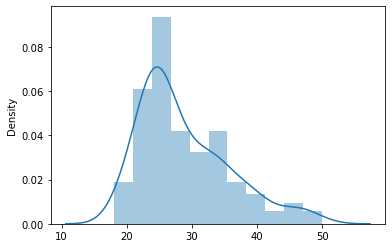

In [18]:
sns.distplot(df[['Age']])

### Bi-Variate Analysis

<AxesSubplot:xlabel='Product', ylabel='Age'>

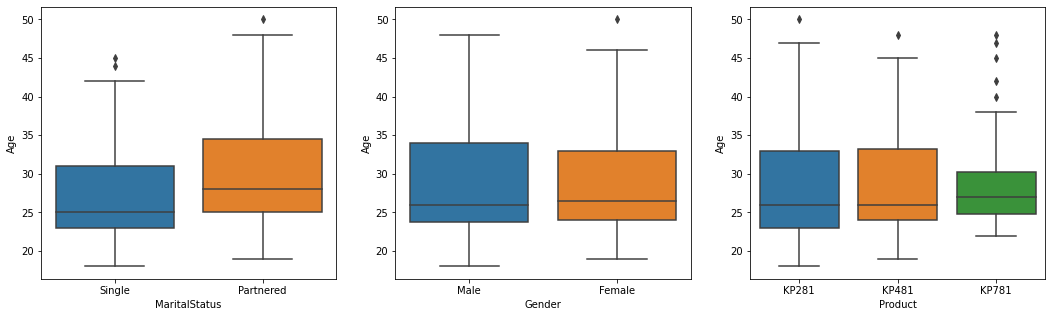

In [19]:

fig, axis = plt.subplots(1,3, figsize=(18, 5))

sns.boxplot(data=df, x="MaritalStatus", y="Age", ax=axis[0])
sns.boxplot(data=df, x="Gender", y="Age", ax=axis[1])
sns.boxplot(data=df, x="Product", y="Age", ax=axis[2])

### Correlation


In [22]:
df['Partnered'] = df[['MaritalStatus']].apply(lambda x: x.map({'Partnered':1,'Single':0}), axis=1)
df['Gender_male'] = df[['Gender']].apply(lambda x: x.map({'Male':1,'Female':0}), axis=1)

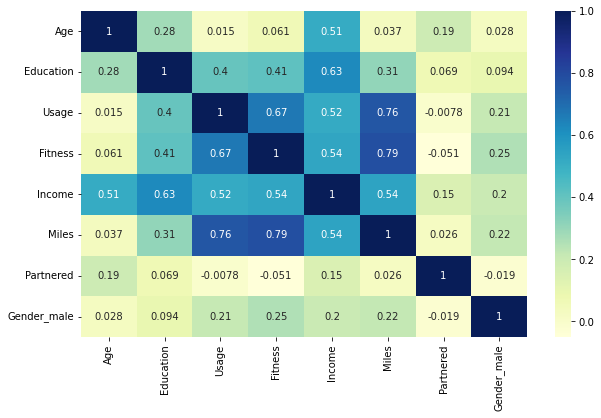

In [26]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(),  cmap="YlGnBu", annot = True)
plt.show()

### Correlation Analysis

1. **Age** : This column is correlated with Education (28 %) & Income (51 %)
2. **Education** is highly correlated with income(63 %), as we know those who've studied will get paid higher. xD
3. **Usage** is correlated & making impact on Fitness, Income & miles .
4. **FItness** is strongly correlated with miles

- As we can see for other columns also correlation does exists by darker parts in the plot.

#### what percent of customers have purchased KP281, KP481, or KP781 in a table

In [32]:
k = pd.crosstab(df['Product'],df['Gender'])
k['Female_prop'] = k['Female']/k['Female'].sum()
k['Male_prop'] = k['Male']/k['Male'].sum()
k

Gender,Female,Male,Female_prop,Male_prop
Product,,,,
KP281,40,40,0.526316,0.384615
KP481,29,31,0.381579,0.298077
KP781,7,33,0.092105,0.317308


#### We can infer from table as Female proportion were using KP281 the most , & males too

In [45]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [47]:
df[df['Product']=='KP281'].describe(exclude='O')

,Age,Education,Usage,Fitness,Income,Miles,Partnered,Gender_male
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000,80.000000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500,0.600000,0.500000
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102,0.492989,0.503155
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000,0.000000,0.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000,0.000000,0.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000,1.000000,0.500000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000,1.000000,1.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000,1.000000,1.000000


### Customer Profiling
**KP281**
- Most of the customers brought KP281. Making it most popular model.
- Average customer income is 46K
- There is equal distribution for both genders [Male & Female](40 each)
- Average age of customer who purchases KP281 is 28.5, Median is 26.
- Average years of Education of customers is 15, and median is 16.
- They expect to use treadmill 3-4 times a week, their avg rate is around 3.
- Equal amount of males and females bought this model suggesting this model is not gender specfic. 
- Majority of the customers who purchased this model are Partnered Females and Single Males compared to Single females and Partnered male. This may be cause of the features this treadmill provides and the cost of treadmill.

### Probability Insights

In [34]:
def prob(gender, print_marginal=False):
    
    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p_781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p_481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p_281 = df1['KP281'][gender] / df1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



### Insights from probability Analysis of Gender & Products:

1. Probability of Males is 58 % & Females is 42.
2. Probability of Kp781 given male is 32 , where as Female is 9
3. Probability of Kp481 given male is 30 , where as Female is 38
4. Probability of Kp281 given male is 38 , where as Female is 53.


In [35]:
def prob(status, print_marginal=False):
    
    
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781'][status] / df1.loc[status].sum()
    p_481 = df1['KP481'][status] / df1.loc[status].sum()
    p_281 = df1['KP281'][status] / df1.loc[status].sum()
    
    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"P(KP781/{status}): {p_781:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP281/{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



### Insights from probability Analysis of Gender & Martial Status:

1. Probability of Single is 41 % & Partnered is 42.
2. Probability of Kp781 given Single is 23 , where as Partnered is 21
3. Probability of Kp481 given Single is 33 , where as Partnered is 34
4. Probability of Kp281 given Single is 44 , where as Partnered is 45.


In [39]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

### Recommendations:
- Recommend the KP281 to users who have high usage rating
- Recommend KP481 to the Single people with usage rating less than 4 to 5
- Recommending the KP781 to the People with higher income as it has more features
- KP281 can be recommended to the females